In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(style="darkgrid")

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('fortune500.csv')

In [5]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [6]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [7]:
df.columns=['year', 'rank', 'company', 'revenue', 'profit']
len(df)

25500

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [9]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')

In [10]:
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [11]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [12]:
len(df.profit[non_numeric_profits])

369

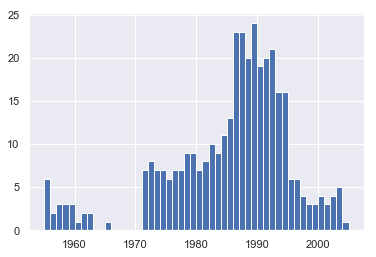

In [13]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955,2006))

In [14]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [15]:
len(df)

25131

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

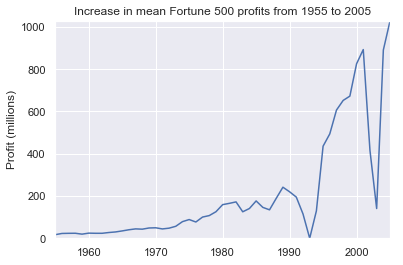

In [18]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 profits from 1955 to 2005', 'Profit (millions)')

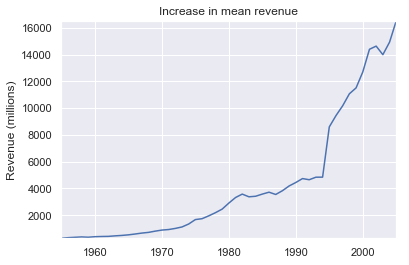

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, "Increase in mean revenue", 'Revenue (millions)')

c:\users\jinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\jinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
c:\users\jinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\jinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


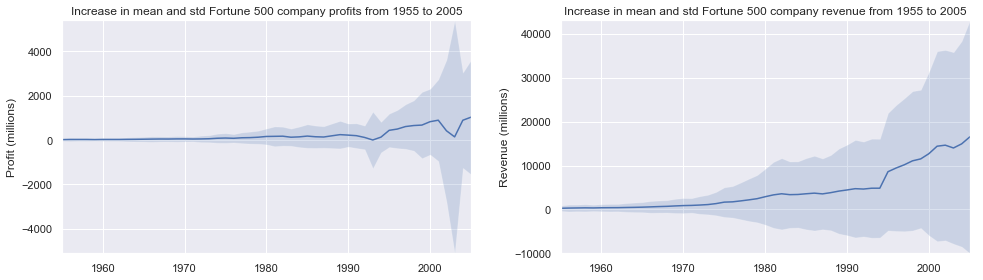

In [20]:
import sys

def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y-stds, y+stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y1.as_matrix(), stds1, ax1, title%'profits', 'Profit (millions)')
plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenue', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()